# Finding the Max Sharpe Ratio Portfolio

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit_110 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


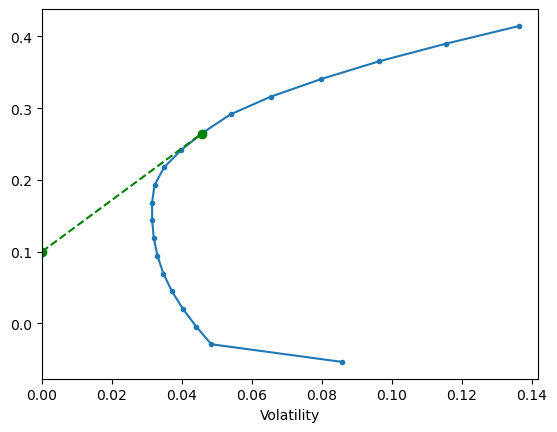

In [9]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = erk.msr(rf,er,cov)
r_msr = erk.portfolio_return(w_msr,er)
vol_msr = erk.portfolio_vol(w_msr,cov)
#ADD CML
cml_x = [0,vol_msr]
cml_y = [rf,r_msr]
ax.plot(cml_x,cml_y,color='green',marker='o',linestyle="dashed")

<Axes: xlabel='Volatility'>

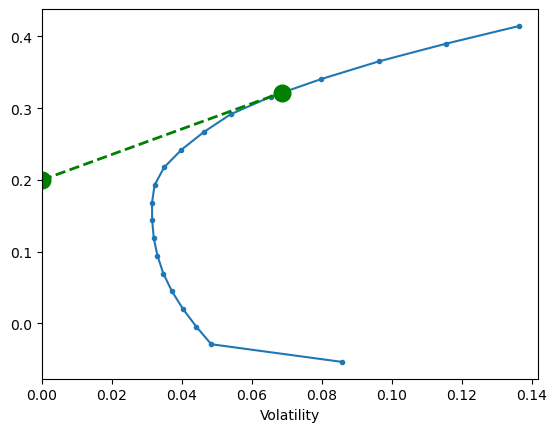

In [12]:
erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.20)

# Lack of Robustness of the Markowitz Procedure,and the GMV

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit_111 as erk
import numpy as np

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
l = ["Food","Steel"]
erk.msr(0.1,er[l],cov.loc[l,l])

array([0.75040363, 0.24959637])

In [20]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [21]:
erk.msr(0.1,np.array([0.11,0.12]),cov.loc[l,l])

array([0.57930354, 0.42069646])

In [23]:
erk.msr(0.1,np.array([0.10,0.13]),cov.loc[l,l])

array([0., 1.])

In [24]:
erk.msr(0.1,np.array([0.13,0.10]),cov.loc[l,l])

array([1., 0.])

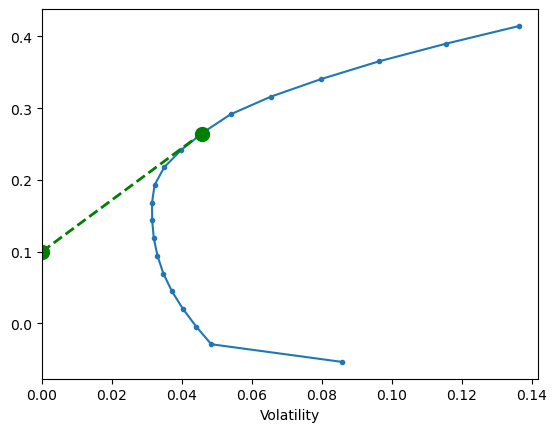

In [25]:
erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.10)